In [2]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, quad_func, misctools, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [10]:
snmin, snmax = 1, 100
#ntype = 'base_roll50'
ntype = 'base_iso_roll50'
ntype_E = 'base_roll50'
#ntype_E = 'base'
#ntype_E = 'cv'
olmax = 1024
#klist = ['TT','TE','EE','EB']
klist = ['comb']
#klist = ['ALLid']
kfltr = 'none'
#emap = 'id'
emap = 'co'

In [11]:
pE = prjlib.analysis_init(t=emap,freq='com',fltr='cinv',ntype=ntype_E)
rho, bb = {}, {}
d = prjlib.data_directory()
p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype)
qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
#mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT'])
dobj = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr=kfltr,elmin=50)
Wsa, __ = prjlib.window('sa',512)
#Wla, __ = prjlib.window('la',ascale=0.)
#Wsa *= hp.pixelfunc.ud_grade(Wla,512)
#wnsa = np.mean(Wsa)
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


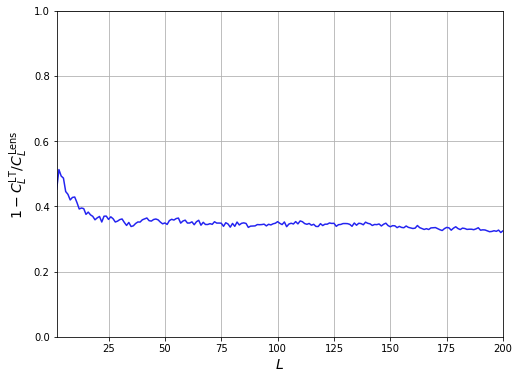

In [12]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=1.,grid=True,ylab=r'$1-C_L^{\rm LT}/C_L^{\rm Lens}$')
for k in klist:
    r = 0.
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj.cl[k][i],unpack=True)
        r += BT**2/BB/TT
    plot(1.-r/(snmax-snmin+1))
savefig('fig_each_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+'-'.join(mobj.klist.keys())+'_'+pE.stag+'_'+'-'.join(klist)+'.png')

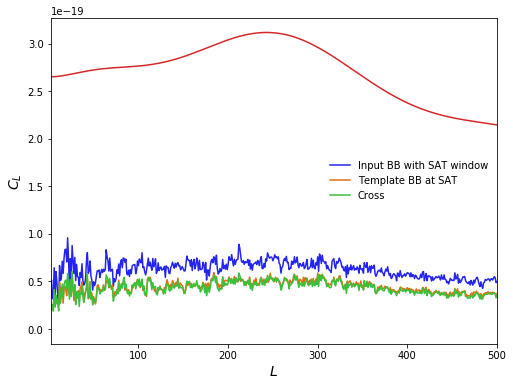

In [6]:
# BB spec
wnsa = 1.
pl.plot_1dstyle(xmin=2,xmax=500)
BB, TT, BT = np.loadtxt(dobj.cl['comb'][1],unpack=True)
plot(BB/wnsa,label='Input BB with SAT window')
plot(TT/wnsa,label='Template BB at SAT')
plot(BT/wnsa,label='Cross')
plot(p.lcl[2])
legend()
#savefig('fig_example.png')

NameError: name 'types' is not defined

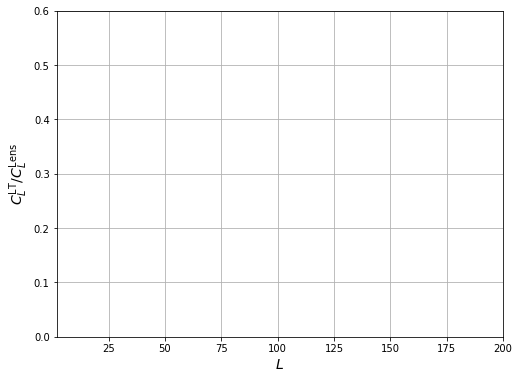

In [6]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.6,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for fltr in types:
    bb, rho = np.loadtxt(dobj.frho,unpack=True,usecols=(1,2))
    #plot(rho[fltr]/bb[fltr])
    plot(rho/bb)
    savefig('fig_wopt_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')

In [ ]:
lmax = 100
nside = 128
vmin, vmax = -1e-7, 1e-7
highpass = np.ones((lmax+1,lmax+1))
highpass[:20,:] = 0.
iblm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1] * highpass
ibmap = curvedsky.utils.hp_alm2map(nside,lmax,lmax,iblm[:lmax+1,:lmax+1]) 
wsa = hp.ud_grade(Wsa,nside)
wblm = pickle.load(open(dobj.falm['TT'][1],"rb"))[:lmax+1,:lmax+1] * 2 * highpass
wbmap = curvedsky.utils.hp_alm2map(nside,lmax,lmax,wblm[:lmax+1,:lmax+1])
prjlib.view_map_from_alm(iblm,nside,lmax,min=vmin,max=vmax)
prjlib.view_map_from_alm(wblm,nside,lmax,min=vmin,max=vmax)
hp.mollview(ibmap*wsa,min=vmin,max=vmax)
savefig('fig_masked_bmap_input.png')
hp.mollview(wbmap*wsa,min=vmin,max=vmax)
savefig('fig_masked_bmap_template_TT.png')